# Pre-trained deep neural networks in PyTorch

**Objectives**

This week, we will apply what we learned in the tutorials and get a quick idea of what a deep neural network is capable of when it comes to image classification tasks. To do so, we will play with a pre-trained neural network (ResNet101). 

## Contents:

1. Pre-trained deep neural networks in PyTorch
2. Making predictions using a neural network in Pytorch  
    1. Defining a preprocess pipeline using PyTorch's transforms  
    2. Loading and preprocessing data  
    3. Making predictions using our neural network  
    4. Interpreting the output  
3. Playing with the ResNet model
4. Good to know

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from torchvision import transforms
from PIL import Image
from os import listdir
from matplotlib import pyplot as plt

## 1. Pre-trained deep neural networks in PyTorch

As written in the documentation:

> The [torchvision.models](https://pytorch.org/vision/stable/models.html#torchvision-models) subpackage contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection and video classification. \[...\] It provides pre-trained models.

[ResNet](https://pytorch.org/vision/stable/models.html#id10) is a deep residual neural network that aims at classifying images. In Pytorch, several pre-trained ResNet models are available with different depths (resnet18, resnet34, resnet50, resnet101 and resnet152). Here we will use [resnet101](https://pytorch.org/vision/stable/models.html#torchvision.models.resnet101).

These pre-trained models were built and trained exactly as we did with our custom neural networks in the tutorials and can also be used in the exact same way. Unsurprisingly, they also subclass [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#module).

In [2]:
# The next line is all we need to create an instance of a pre-trained ResNet101 model 
# 101 means that we choose the ResNet architecture with 101 layers
resnet = models.resnet101(pretrained=True)   
print("Pytorch class of pre-trained  models: ", type(resnet))
print("Which is subclass of a nn.Module:     ", issubclass(type(resnet), nn.Module))
print("\n", resnet)      

D:\conda\envs\inf265\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\conda\envs\inf265\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Pytorch class of pre-trained  models:  <class 'torchvision.models.resnet.ResNet'>
Which is subclass of a nn.Module:      True

 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

**QUESTIONS**

1. If we have 1000 different labels (e.g cat, dog, mouse, goose, etc) what should be the dimension of the output layer of the neural network?
 - If we are classifying then it would have 1000 nodes in the output layer. So the dimension would be (1,1000)
2. In the output above we can see a module called "Sequential". We already met this module in the second and third tutorial, can you briefly explained what it is?
 - The sequential module is a containter that stores other models in a sequential order. It can then execute them sequentially with .forward() method. For example a convolution layer is done before a ReLu layer.  
3. In the output above we can also see a module called "Bottleneck". This module was very quickly mentioned in the third tutorial, do you remember what it is? 
- It is a block/group of layers, used to more easily define deeper neural networks.

## 2. Making predictions using a neural network in Pytorch

In this section we will:

1. Load an image and our labels
1. Preprocess our image
1. Make predictions using our neural network
1. Interpret the output

### 2.1 Defining a preprocess pipeline using PyTorch's transforms

As we saw in the tutorials, the [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html#torchvision-transforms) module can easily performs the most common image transformations such as [Resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize), [CenterCrop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.CenterCrop), [ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor), [Normalize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize), etc. In addition, this module allows us to quickly define preprocessing pipelines using the [transforms.Compose](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Compose) method.

In the following cell we define the pre-processing transformations that will be applied on our input images. Remember that when it comes to storing numerical data, the "PyTorch-friendly objects" are not numpy arrays but PyTorch's [tensors](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) and that the [ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) transform implicitly:

1. Reshapes a ``(H, W, C)`` image into a ``(C, H, W)`` tensor (Height, Width, Channel (color))
2. Rescales ``[0 255]`` int arrays into ``[0 1]`` float tensors

**TODO** 

Use [transforms.Compose](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Compose) as well as appropriate transforms in order to define a preprocessor ``preprocessor`` that:
1. Resize images to ``256x256``  
1. Crop images, keeping only the ``224x224`` pixels at the center
1. Transform images to tensors
1. Normalize tensors, using ``mean = [0.485, 0.456, 0.406]`` and ``std = [0.229, 0.224, 0.225]``

In [3]:
#TODO:
preprocessor = transforms.Compose([
    transforms.Resize((256,256)), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

### 2.2 Loading and preprocessing data

Shape of our input batch:  torch.Size([1, 3, 224, 224])


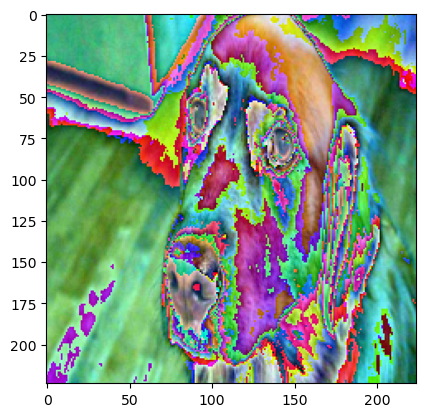

In [4]:
# ------------------------------
# Images
# ------------------------------

# Load one of our images
img = Image.open("imgs/Bobby.jpeg")
#Showing the image
img.show()

# Preprocess our image using our preprocessor ('t' stands for 'tensor')
img_t = preprocessor(img)
# Reshape so that it is a batch (of size 1) as required in Pytorch         
batch_t = torch.unsqueeze(img_t, 0)
# Check that it has the required shape (N, C, H, W)
# (See 2nd tutorial if you're struggling with shape conventions in Pytorch)
print("Shape of our input batch: ", batch_t.size())
ten_to_im =transforms.ToPILImage()
img_b = ten_to_im(img_t)
plt.imshow(img_b)
# ------------------------------
# Labels
# ------------------------------

# Read all the labels with which ResNet was trained and store them in the list 'labels'
with open('list_labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

### 2.3 Making predictions using our neural network

After recalling that: 

> "Some models use modules which have different training and evaluation behavior, such as batch normalization. To switch between these modes, use [model.train()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.train) or [model.eval()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval) (from the [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#module)) as appropriate.

We are now ready to make some predictions on our images. Let's show the output of the resnet model given our image of Bobby the Golden Retriever.

**QUESTION** 

1. Set ``resnet`` in evaluation mode.
1. Compute the output ``out`` corresponding to the input batch ``batch_t`` (defined in the cell above) 
1. Print the output tensor
1. Print the dimension the output tensor using the [Tensor.size()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.size) method
2. Does it match your previous answer about the output dimension? 

In [5]:
# TODO:
resnet.eval()
out = resnet(batch_t)
print('The output tensor of the input batch_t:\n', out)
print('\nThe dimension of the tensor', out.size())

#Yes it matches my previous answer

The output tensor of the input batch_t:
 tensor([[-4.0712e+00, -2.0699e+00, -3.4087e+00, -4.1446e+00, -3.5682e+00,
         -2.2347e+00, -2.7784e+00, -2.7016e+00, -1.1663e+00, -2.9438e+00,
         -1.0905e+00, -1.6917e+00, -2.5023e+00, -2.8601e+00, -2.5376e+00,
         -2.9397e+00, -3.2281e+00, -9.2253e-01, -9.8481e-01, -1.1391e+00,
         -3.0696e+00, -3.2517e+00, -2.2352e+00, -4.2805e-01, -1.2303e+00,
         -6.6024e-01, -3.1257e+00, -2.3592e+00, -1.2504e+00, -3.1553e+00,
         -3.4154e+00, -2.0323e+00, -2.1454e+00, -2.5607e+00, -1.4779e+00,
         -3.3052e+00, -1.0753e+00, -1.3638e+00, -1.0378e+00, -1.4442e+00,
         -2.7046e-01, -1.4807e+00,  9.9040e-01, -3.7747e-01, -1.3689e+00,
         -1.1475e+00,  6.6092e-01, -1.2246e+00, -2.8056e+00, -2.9696e+00,
         -2.5830e+00, -2.2183e+00, -1.1871e+00, -1.3426e+00, -1.9959e+00,
         -1.4256e+00, -2.0147e-01, -1.3970e+00, -3.1791e+00, -5.6617e-01,
         -2.5669e-01, -1.1630e+00, -4.4703e-01, -1.2146e+00, -1.4597e+0

### 2.4 Interpreting the output

You don't know what to do with that tensor right? How do you know if this output tensor means that the image is a dog or a cat or something else? 

Well that's actually simple. The first idea would be to find the most activated output unit, that is to say, the index of max value and find the label with the corresponding index. To do so we use the [torch.max](https://pytorch.org/docs/stable/generated/torch.max.html?highlight=max#torch.max) function

In [6]:
_, index = torch.max(out, 1)
print(
    "Index: ", index,  
    "\nLabel: ", labels[index], 
    "\nOutput value: ", out[0, index]
    ) 

Index:  tensor([207]) 
Label:  golden retriever 
Output value:  tensor([16.1769], grad_fn=<IndexBackward0>)


Now the question is "how to interpret this output value?" How can we say if the model hesitates between this label and another one? 

We would like to convert this tensor value into something that could be interpreted as the confidence that the model has in its prediction. To do so, we use the [softmax](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.softmax) function which normalizes our outputs to \[0, 1\]
For more information about the SoftMax function, you can watch the videos by Andrew Ng: 
- [Softmax Regression (C2W3L08)](https://www.youtube.com/watch?v=LLux1SW--oM)
- [Training Softmax Classifier (C2W3L09)](https://www.youtube.com/watch?v=ueO_Ph0Pyqk)

**QUESTION** 

1. Find the index corresponding to the max value of ``out`` **Hint:** Look at the previous cell 

In [7]:
# TODO: Find the index corresponding to the max value of out
_, index = torch.max(out, 1)
confidences = F.softmax(out, dim=1)[0]
percentages = confidences * 100
print(
    "Label: ",labels[index[0]], 
    "\nConfidence: ", round(percentages[index[0]].item(), 2), "%")

Label:  golden retriever 
Confidence:  97.5 %


#### Top-1 and Top-5 errors

When evaluating an image classifier we often use the terms *Top-1 error* and *Top-5 error* 

If the classifier’s top guess is the correct answer (e.g., the highest score is for the “dog” class, and the test image is actually of a dog), then the correct answer is said to be in the Top-1. If the correct answer is at least among the classifier’s top 5 guesses, it is said to be in the Top-5.

The top-1 score is the conventional accuracy, that is to say it checks if the top class (the one having the highest confidence) is the same as the target label. This is what we have done in the cell above. On the other hand, the top-5 score checks if the target label is one of your top 5 predictions (the 5 ones with the highest confidences). To do so we use the [torch.sort](https://pytorch.org/docs/stable/generated/torch.sort.html#torch-sort) function

**QUESTIONS**

1. Complete the code below **Hint:** Look at how we preprocessed the first image Bobby 
2. Does the model seem confident about the first prediction?

In [8]:
num_preds = 5

img = Image.open("imgs/golden_retriever_online.jpeg")
print(type(img))
# TODO: preprocess the image 
img_t = preprocessor(img)
# TODO: create a batch of size 1
batch_t = torch.unsqueeze(img_t, 0)
# TODO: Compute the output tensor of the tensor image contained in img_t
resnet.eval()
out = resnet(batch_t)
# TODO: Compute the percentage representing the confidence of the model about the output
confidences = F.softmax(out, dim=1)[0]
percentages = confidences * 100
_, indices = torch.sort(out, descending=True)

results = [(labels[idx], round(percentages[idx].item(), 2)) for idx in indices[0][:num_preds]]
for i_pred in range(num_preds):
    print(
        "Guess number ", i_pred, ": ",
        "\n    Label: ", results[i_pred][0], 
        "\n    Confidence: ",  results[i_pred][1],"%"
        )

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Guess number  0 :  
    Label:  golden retriever 
    Confidence:  78.83 %
Guess number  1 :  
    Label:  cocker spaniel, English cocker spaniel, cocker 
    Confidence:  4.23 %
Guess number  2 :  
    Label:  Sussex spaniel 
    Confidence:  2.83 %
Guess number  3 :  
    Label:  Brittany spaniel 
    Confidence:  2.03 %
Guess number  4 :  
    Label:  Pembroke, Pembroke Welsh corgi 
    Confidence:  1.95 %


## 3. Playing with the ResNet model

Put all the images that you want in the 'imgs/' folder (could be personal pictures or taken from the internet)

**QUESTIONS**

1. Complete the code below so that for each image it prints the 5 best guests according to the model
2. When the image is a dog, what are usually the 1st, 2nd, 3rd guesses? 
3. Use one of your personal pictures of an object whose label is in the list of labels.
4. Try to find an image on the web whose label is in the list of labels but whose corresponding prediction is wrong. How can you try to make it difficult for the model to recognize the object? 
5. Try to find an image on the web whose label is NOT in the list of labels with which the model was trained. Look at the output, is it consistent even though it is necessarily wrong? 

In [9]:
# ------------------------------
# Load inputs
# ------------------------------

# Load all the images in the 'imgs/' folder
list_img_t = []                  # Where input tensors will be stored
path_imgs = 'imgs/'   
list_files = listdir('imgs/')    # Find all filenames in the 'imgs/' folder
for f in list_files:
    img = Image.open(path_imgs + f)
    img = img.convert('RGB')  # Because some of the images are in the RGBA format while ResNet requires a RGB format
    # TODO: preprocess the image
    ...
    img_t = preprocessor(img)
    list_img_t.append(torch.unsqueeze(img_t, 0) )

# ------------------------------
# Make predictions
# ------------------------------
num_preds = 5
for i, batch_t in enumerate(list_img_t):
    print("\n ====== ", list_files[i], " ====== ")

    # TODO: Compute the output tensor of the tensor image contained in batch_t
    resnet.eval()
    out = resnet(batch_t)
    
    # TODO: Compute the percentage representing the confidence of the model about the output
    _, index = torch.max(out, 1)
    confidences = F.softmax(out, dim=1)[0]
    percentages = confidences * 100
    
    # TODO: Sort the out tensor in descending order
    _, indices = torch.sort(out, descending=True)
    results = [(labels[idx], round(percentages[idx].item(), 2)) for idx in indices[0][:num_preds]]
    for i_pred in range(num_preds):
        print(
            "Guess number ", i_pred, ": ",
            "\n    Label: ", results[i_pred][0], 
            "\n    Confidence: ",  results[i_pred][1],"%"
            )


 ======  Akita_personal.jpg  ====== 
Guess number  0 :  
    Label:  chow, chow chow 
    Confidence:  38.76 %
Guess number  1 :  
    Label:  golden retriever 
    Confidence:  17.03 %
Guess number  2 :  
    Label:  Eskimo dog, husky 
    Confidence:  13.97 %
Guess number  3 :  
    Label:  malamute, malemute, Alaskan malamute 
    Confidence:  8.86 %
Guess number  4 :  
    Label:  Samoyed, Samoyede 
    Confidence:  4.88 %

 ======  Bobby.jpeg  ====== 
Guess number  0 :  
    Label:  golden retriever 
    Confidence:  97.5 %
Guess number  1 :  
    Label:  Labrador retriever 
    Confidence:  1.97 %
Guess number  2 :  
    Label:  tennis ball 
    Confidence:  0.18 %
Guess number  3 :  
    Label:  redbone 
    Confidence:  0.06 %
Guess number  4 :  
    Label:  cocker spaniel, English cocker spaniel, cocker 
    Confidence:  0.06 %

 ======  dog_meme.png  ====== 
Guess number  0 :  
    Label:  dingo, warrigal, warragal, Canis dingo 
    Confidence:  21.41 %
Guess number  1 :  
 

Making a function to scrape an image from the web and evaluating it

Using the modules: random, requests and beautifulsoup4. 

Code inspired from: https://www.youtube.com/watch?v=bQsLwt6BLTw - Web Scraping Using Beautiful Soup | Sanjay Kumar

In [11]:
def restnet_eval_img(img):
    
    #Preprocess
    img_t = preprocessor(img)
    
    #create a batch of size 1
    batch_t = torch.unsqueeze(img_t, 0)
    #Compute the output tensor of the tensor image contained in img_t
    resnet.eval()
    out = resnet(batch_t)
    #Compute the percentage representing the confidence of the model about the output
    confidences = F.softmax(out, dim=1)[0]
    percentages = confidences * 100
    _, indices = torch.sort(out, descending=True)

    results = [(labels[idx], round(percentages[idx].item(), 2)) for idx in indices[0][:num_preds]]
    for i_pred in range(num_preds):
        print(
            "Guess number ", i_pred, ": ",
            "\n    Label: ", results[i_pred][0], 
            "\n    Confidence: ",  results[i_pred][1],"%"
            )


In [12]:
import random
import requests
from bs4 import BeautifulSoup
from skimage import io 

In [26]:
def get_images(label=random):
    if label == random:
        #Pick a random label
        label = random.choice(labels).split(',')[0]
        print(label)
    
    #Search on google images with the label
    url = 'https://www.google.com/images?q='+ label
    r = requests.get(url)
    soup = BeautifulSoup(r.text)
    
    #Find all the images
    images = soup.findAll('img')
    
    #Return the images
    return images

In [48]:
def evaluate_all_images(images):
    
    #For every image, get the source and if it is not a gif then try to evaluate.
    for count, img in enumerate(images):
        img = img.get('src')
        print('\nPicture:', count)
        try:
            if 'gif' not in img.split('.'):
                img = io.imread(img,plugin='matplotlib')
                plt.imshow(img)
                plt.show()
                img = Image.fromarray(img)
                restnet_eval_img(img)
            else:
                print('\nCannot evaluate a gif\n')
        except NameError:
            print(NameError)

def evaluate_random_image(images):
    img = images[random.randint(0,20)].get('src')
    try:
        if 'gif' not in img.split('.'):
            img = io.imread(img,plugin='matplotlib')
            plt.imshow(img)
            plt.show()
            img = Image.fromarray(img)
            restnet_eval_img(img)
        else:
            print('\nCannot evaluate a gif\n')
    except NameError:
        print(NameError)
    


organ

Picture: 0

Cannot evaluate a gif


Picture: 1


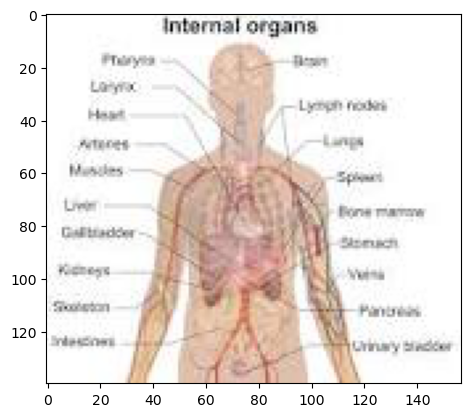

Guess number  0 :  
    Label:  web site, website, internet site, site 
    Confidence:  96.42 %
Guess number  1 :  
    Label:  book jacket, dust cover, dust jacket, dust wrapper 
    Confidence:  2.2 %
Guess number  2 :  
    Label:  menu 
    Confidence:  0.5 %
Guess number  3 :  
    Label:  hoopskirt, crinoline 
    Confidence:  0.23 %
Guess number  4 :  
    Label:  comic book 
    Confidence:  0.18 %

Picture: 2


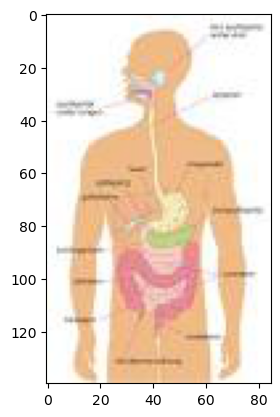

Guess number  0 :  
    Label:  sweatshirt 
    Confidence:  28.15 %
Guess number  1 :  
    Label:  jersey, T-shirt, tee shirt 
    Confidence:  20.12 %
Guess number  2 :  
    Label:  maillot, tank suit 
    Confidence:  13.95 %
Guess number  3 :  
    Label:  safety pin 
    Confidence:  7.48 %
Guess number  4 :  
    Label:  book jacket, dust cover, dust jacket, dust wrapper 
    Confidence:  5.4 %

Picture: 3


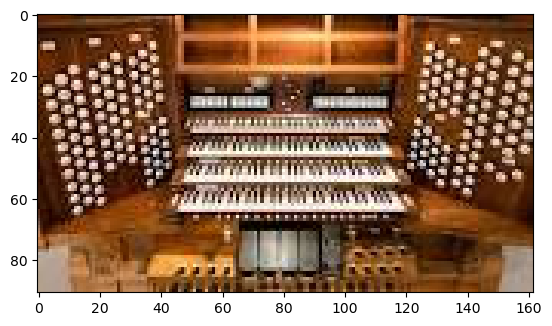

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  99.7 %
Guess number  1 :  
    Label:  tobacco shop, tobacconist shop, tobacconist 
    Confidence:  0.24 %
Guess number  2 :  
    Label:  library 
    Confidence:  0.01 %
Guess number  3 :  
    Label:  accordion, piano accordion, squeeze box 
    Confidence:  0.01 %
Guess number  4 :  
    Label:  bookcase 
    Confidence:  0.0 %

Picture: 4


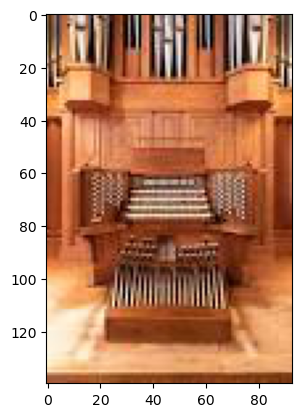

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  98.99 %
Guess number  1 :  
    Label:  plate rack 
    Confidence:  0.72 %
Guess number  2 :  
    Label:  studio couch, day bed 
    Confidence:  0.04 %
Guess number  3 :  
    Label:  tobacco shop, tobacconist shop, tobacconist 
    Confidence:  0.03 %
Guess number  4 :  
    Label:  space heater 
    Confidence:  0.02 %

Picture: 5


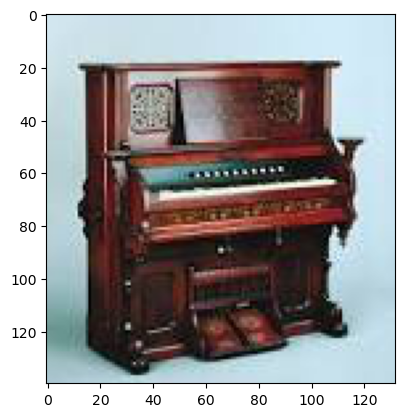

Guess number  0 :  
    Label:  upright, upright piano 
    Confidence:  97.88 %
Guess number  1 :  
    Label:  organ, pipe organ 
    Confidence:  0.99 %
Guess number  2 :  
    Label:  throne 
    Confidence:  0.43 %
Guess number  3 :  
    Label:  slot, one-armed bandit 
    Confidence:  0.16 %
Guess number  4 :  
    Label:  chiffonier, commode 
    Confidence:  0.11 %

Picture: 6


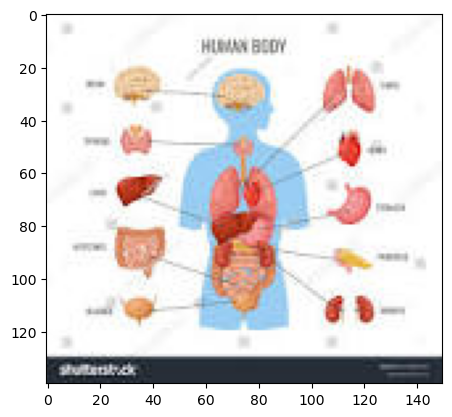

Guess number  0 :  
    Label:  web site, website, internet site, site 
    Confidence:  39.85 %
Guess number  1 :  
    Label:  maraca 
    Confidence:  5.35 %
Guess number  2 :  
    Label:  envelope 
    Confidence:  5.34 %
Guess number  3 :  
    Label:  comic book 
    Confidence:  4.84 %
Guess number  4 :  
    Label:  safety pin 
    Confidence:  4.08 %

Picture: 7


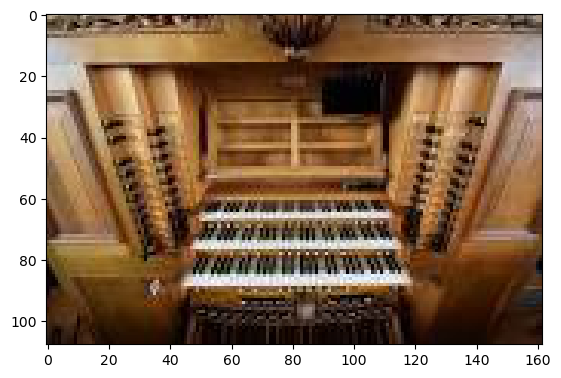

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  87.81 %
Guess number  1 :  
    Label:  upright, upright piano 
    Confidence:  8.3 %
Guess number  2 :  
    Label:  tobacco shop, tobacconist shop, tobacconist 
    Confidence:  2.09 %
Guess number  3 :  
    Label:  bookcase 
    Confidence:  0.27 %
Guess number  4 :  
    Label:  shoji 
    Confidence:  0.25 %

Picture: 8


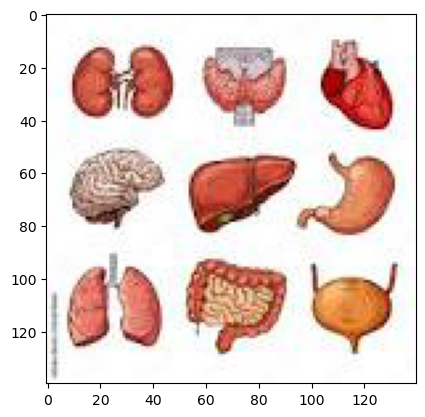

Guess number  0 :  
    Label:  punching bag, punch bag, punching ball, punchball 
    Confidence:  26.67 %
Guess number  1 :  
    Label:  maraca 
    Confidence:  13.39 %
Guess number  2 :  
    Label:  ocarina, sweet potato 
    Confidence:  12.43 %
Guess number  3 :  
    Label:  pick, plectrum, plectron 
    Confidence:  5.03 %
Guess number  4 :  
    Label:  plunger, plumber's helper 
    Confidence:  3.28 %

Picture: 9


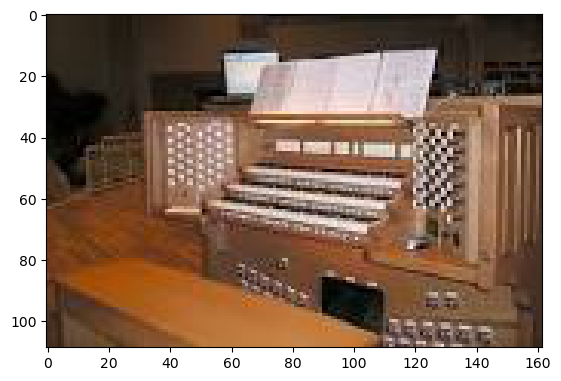

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  99.79 %
Guess number  1 :  
    Label:  upright, upright piano 
    Confidence:  0.07 %
Guess number  2 :  
    Label:  tobacco shop, tobacconist shop, tobacconist 
    Confidence:  0.07 %
Guess number  3 :  
    Label:  cassette player 
    Confidence:  0.01 %
Guess number  4 :  
    Label:  space bar 
    Confidence:  0.01 %

Picture: 10


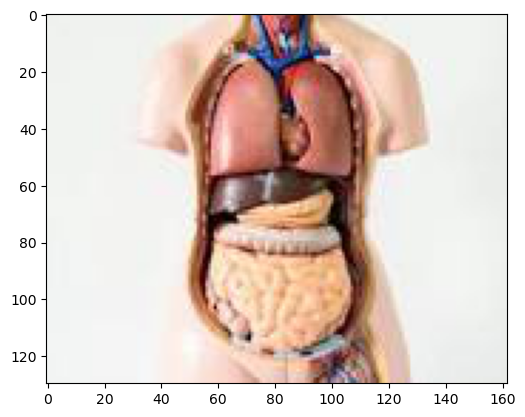

Guess number  0 :  
    Label:  sandal 
    Confidence:  51.3 %
Guess number  1 :  
    Label:  clog, geta, patten, sabot 
    Confidence:  17.69 %
Guess number  2 :  
    Label:  knee pad 
    Confidence:  9.42 %
Guess number  3 :  
    Label:  muzzle 
    Confidence:  6.16 %
Guess number  4 :  
    Label:  Loafer 
    Confidence:  3.48 %

Picture: 11


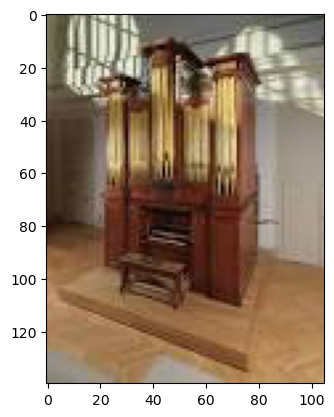

Guess number  0 :  
    Label:  shoji 
    Confidence:  29.91 %
Guess number  1 :  
    Label:  fire screen, fireguard 
    Confidence:  28.11 %
Guess number  2 :  
    Label:  organ, pipe organ 
    Confidence:  17.32 %
Guess number  3 :  
    Label:  pedestal, plinth, footstall 
    Confidence:  11.53 %
Guess number  4 :  
    Label:  plate rack 
    Confidence:  3.55 %

Picture: 12


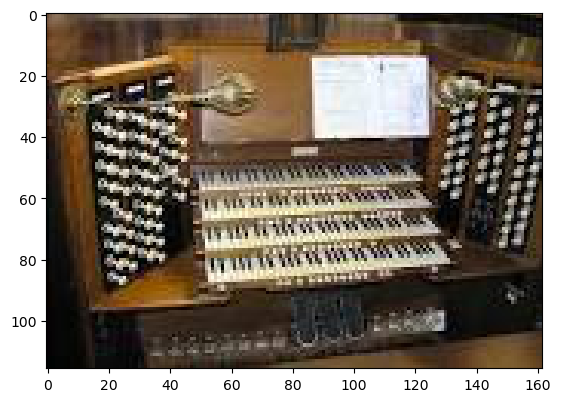

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  99.18 %
Guess number  1 :  
    Label:  abacus 
    Confidence:  0.42 %
Guess number  2 :  
    Label:  tobacco shop, tobacconist shop, tobacconist 
    Confidence:  0.38 %
Guess number  3 :  
    Label:  chime, bell, gong 
    Confidence:  0.0 %
Guess number  4 :  
    Label:  accordion, piano accordion, squeeze box 
    Confidence:  0.0 %

Picture: 13


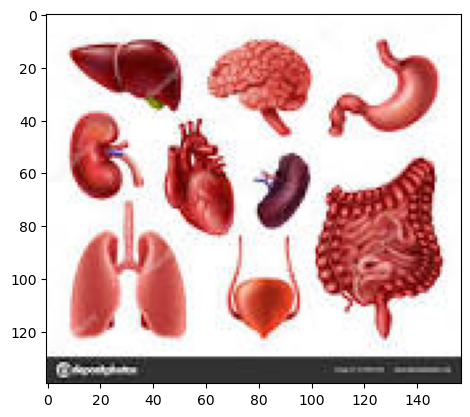

Guess number  0 :  
    Label:  American lobster, Northern lobster, Maine lobster, Homarus americanus 
    Confidence:  16.71 %
Guess number  1 :  
    Label:  plunger, plumber's helper 
    Confidence:  10.1 %
Guess number  2 :  
    Label:  punching bag, punch bag, punching ball, punchball 
    Confidence:  8.71 %
Guess number  3 :  
    Label:  lipstick, lip rouge 
    Confidence:  6.63 %
Guess number  4 :  
    Label:  ocarina, sweet potato 
    Confidence:  5.96 %

Picture: 14


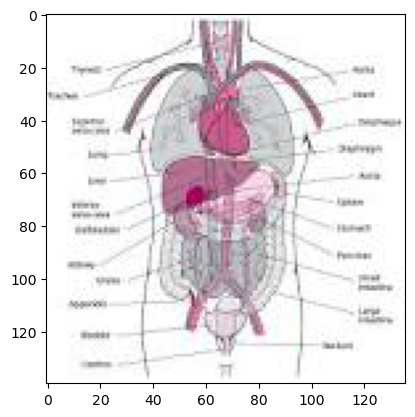

Guess number  0 :  
    Label:  web site, website, internet site, site 
    Confidence:  30.88 %
Guess number  1 :  
    Label:  ballpoint, ballpoint pen, ballpen, Biro 
    Confidence:  9.54 %
Guess number  2 :  
    Label:  binder, ring-binder 
    Confidence:  8.3 %
Guess number  3 :  
    Label:  nipple 
    Confidence:  7.52 %
Guess number  4 :  
    Label:  whistle 
    Confidence:  6.31 %

Picture: 15


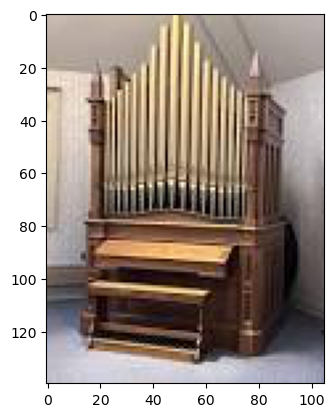

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  95.2 %
Guess number  1 :  
    Label:  fire screen, fireguard 
    Confidence:  1.0 %
Guess number  2 :  
    Label:  throne 
    Confidence:  0.67 %
Guess number  3 :  
    Label:  plate rack 
    Confidence:  0.43 %
Guess number  4 :  
    Label:  studio couch, day bed 
    Confidence:  0.34 %

Picture: 16


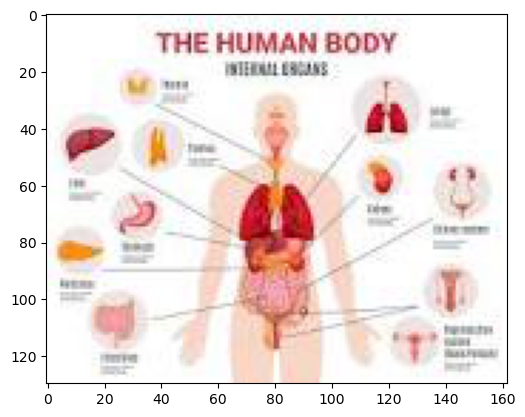

Guess number  0 :  
    Label:  safety pin 
    Confidence:  22.29 %
Guess number  1 :  
    Label:  hair slide 
    Confidence:  17.93 %
Guess number  2 :  
    Label:  web site, website, internet site, site 
    Confidence:  12.58 %
Guess number  3 :  
    Label:  plunger, plumber's helper 
    Confidence:  2.11 %
Guess number  4 :  
    Label:  slot, one-armed bandit 
    Confidence:  1.94 %

Picture: 17


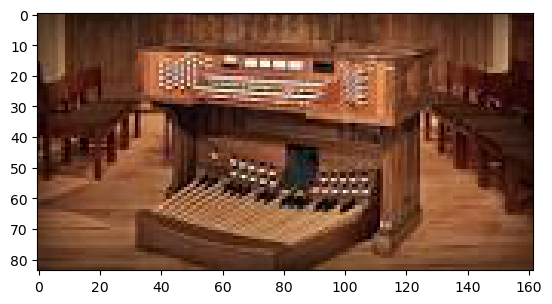

Guess number  0 :  
    Label:  tobacco shop, tobacconist shop, tobacconist 
    Confidence:  81.2 %
Guess number  1 :  
    Label:  cassette player 
    Confidence:  9.71 %
Guess number  2 :  
    Label:  organ, pipe organ 
    Confidence:  6.65 %
Guess number  3 :  
    Label:  espresso maker 
    Confidence:  0.68 %
Guess number  4 :  
    Label:  upright, upright piano 
    Confidence:  0.45 %

Picture: 18


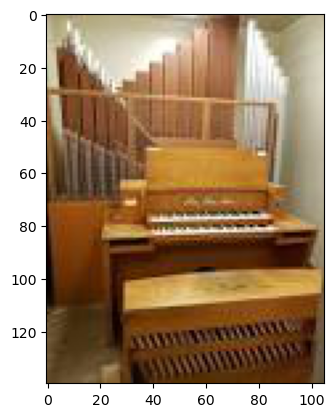

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  98.97 %
Guess number  1 :  
    Label:  upright, upright piano 
    Confidence:  0.79 %
Guess number  2 :  
    Label:  panpipe, pandean pipe, syrinx 
    Confidence:  0.1 %
Guess number  3 :  
    Label:  bannister, banister, balustrade, balusters, handrail 
    Confidence:  0.04 %
Guess number  4 :  
    Label:  studio couch, day bed 
    Confidence:  0.02 %

Picture: 19


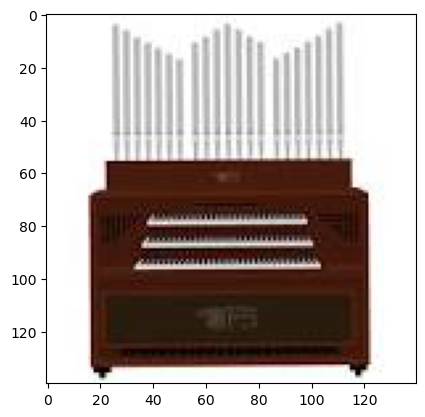

Guess number  0 :  
    Label:  organ, pipe organ 
    Confidence:  96.77 %
Guess number  1 :  
    Label:  upright, upright piano 
    Confidence:  3.18 %
Guess number  2 :  
    Label:  accordion, piano accordion, squeeze box 
    Confidence:  0.03 %
Guess number  3 :  
    Label:  panpipe, pandean pipe, syrinx 
    Confidence:  0.01 %
Guess number  4 :  
    Label:  grand piano, grand 
    Confidence:  0.01 %

Picture: 20


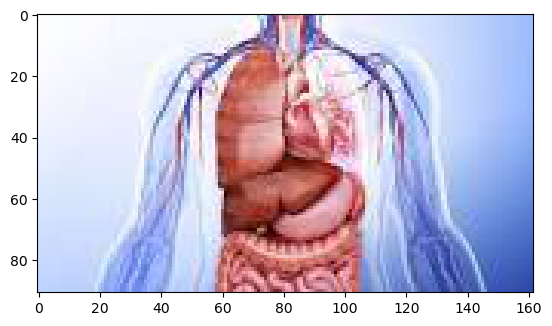

Guess number  0 :  
    Label:  plastic bag 
    Confidence:  12.45 %
Guess number  1 :  
    Label:  Petri dish 
    Confidence:  10.89 %
Guess number  2 :  
    Label:  oxygen mask 
    Confidence:  8.17 %
Guess number  3 :  
    Label:  Windsor tie 
    Confidence:  7.17 %
Guess number  4 :  
    Label:  cloak 
    Confidence:  3.59 %
fig


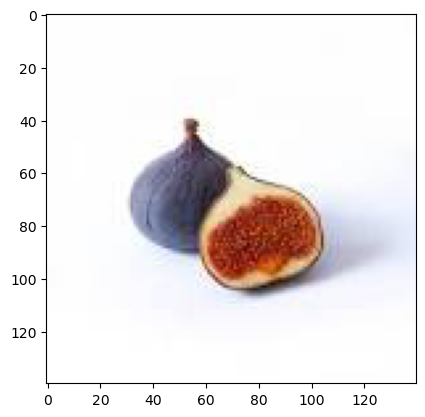

Guess number  0 :  
    Label:  fig 
    Confidence:  100.0 %
Guess number  1 :  
    Label:  butternut squash 
    Confidence:  0.0 %
Guess number  2 :  
    Label:  spaghetti squash 
    Confidence:  0.0 %
Guess number  3 :  
    Label:  tick 
    Confidence:  0.0 %
Guess number  4 :  
    Label:  whiskey jug 
    Confidence:  0.0 %


In [51]:
images = get_images()
evaluate_all_images(images)

images = get_images()
evaluate_random_image(images)

## 4. Good to know
- In PyTorch, data are stored in [tensors](https://pytorch.org/docs/stable/tensors.html#torch.Tensor). This is the Pytorch counterpart of Numpy's array and most of the methods that are available in Numpy are also available in Pytorch. (e.g 
[size](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.size), 
[amax](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.amax), 
[argmax](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.argmax), 
[sort](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sort), 
[abs](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.abs), 
[cos](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.cos), 
[sum](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sum) etc.)
- In PyTorch all neural networks should be a class that is itself a subclass of the PyTorch's [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#module) class
- There are many well-known deep neural network architectures available in the [torchvision.models](https://pytorch.org/vision/stable/models.html?highlight=models) sub-package. 
  - For each of these architectures a pre-trained model is available. 
  - Some of them such as the ResNet architecture even have multiple pre-trained model instances of different depths. For the [ResNet](https://pytorch.org/vision/stable/models.html#id10) class, we have [resnet18](https://pytorch.org/vision/stable/models.html#torchvision.models.resnet18), [resnet50](https://pytorch.org/vision/stable/models.html#torchvision.models.resnet50), [resnet101](https://pytorch.org/vision/stable/models.html#torchvision.models.resnet101), etc.
- During the preprocessing, we can use the [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html#torchvision-transforms) module to perform the most common image transformations
- Some models use modules that have different training and evaluation behavior, such as batch normalization. To switch between these modes, we use [model.train()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.train) and [model.eval()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval) accordingly
- Top-1 and Top-5 scores are commonly used in image classification
- When there are more than 2 possible classes we often use the [SoftMax]((https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.softmax)) function in the output layer to convert the output tensor values into confidence values.
- However, we will see in this course that we don't need a softmax function in the output layer if we use [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html?highlight=crossentro#torch.nn.CrossEntropyLoss) loss function.